# Prelim EDA

In [637]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geopandas as gpd
locator = Nominatim(user_agent="katie")
geocode = RateLimiter(locator.geocode, min_delay_seconds=3)
import os
if not os.path.exists("images"): 
    os.mkdir("images")
pd.set_option('display.max_columns', None)

Table

 - <a href="#ex_na">Explore NAs</a><br>

- [Column definitions](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
- [Column Variables](https://www.kaggle.com/datasets/ahmedmohameddawoud/ames-housing-data)

#### Reading in Data

In [927]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
pic = pd.read_csv('Ames Real Estate Data.csv', index_col = 0)

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_19131/1286202135.py:2: DtypeWarning:

Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.



In [930]:
housing.shape #(2580, 81)
housing.PID.value_counts() #2579 unique parcels
housing.head(2)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal


In [931]:
pic.head(2)

,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
MapRefNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD \nOUTLOT V\n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,481100,0,0,481100,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,HUNZIKER DEVELOPMENT GROUP LLC,NaN,105 S 16TH ST,NaN,AMES,IA,50010.0,NaN,2019.0,7.0,201906213,2019.0,7.0,NaN,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deed,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


<Axes: ylabel='Frequency'>

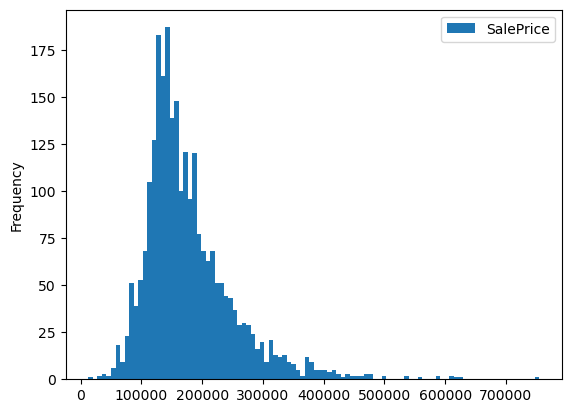

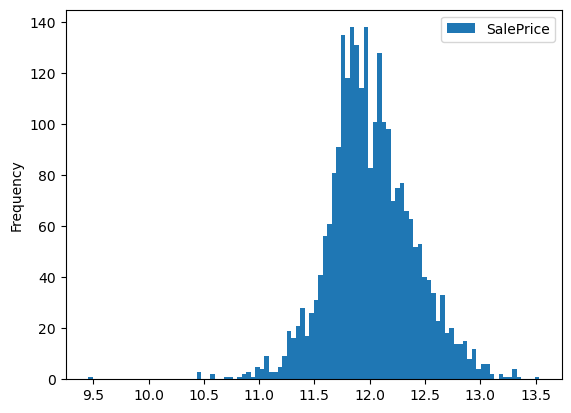

In [1177]:
#histogram of Sales Price
housing[['SalePrice']].plot.hist(bins = 100) #kind of skewed
np.log(housing[['SalePrice']]).plot.hist(bins = 100)

#### GeoMapping Houses

In [949]:
#Trimming pic file for merging
pic_par = pic.reset_index()[['MapRefNo','Prop_Addr']].value_counts().reset_index().drop(columns = 'count') #21878

#No missing PIC in housing doc
housing.PID.isna().sum()
pic_par.head(2)

#Merging housing and pic file
housing_m = housing.merge(pic_par,how = 'left', left_on = 'PID', right_on = 'MapRefNo')
housing_m.shape #(2580, 83)
housing_m.head(2)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST


In [950]:
#Spot Checking, one record
housing_m[housing_m.PID == 923226300] 

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr
697,923226300,1092,85500,160,RM,21.0,1504,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,4,1972,1972,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1.0,253.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,923226300.0,609 MEADOW PL


In [951]:
#drop NA addresses
housing_m = housing_m.dropna(subset=['Prop_Addr'])
housing_m.shape #(2603, 171)
# housing_m.head(13)

#drop unit numbers from Addresses
housing_m.Prop_Addr.str.replace(r'\d+$', '', regex=True)
housing_m.shape #(2559, 83)
housing_m[housing_m.PID == 923226300]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr
697,923226300,1092,85500,160,RM,21.0,1504,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,4,1972,1972,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1.0,253.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,923226300.0,609 MEADOW PL


In [952]:
# Using Geopy to encode long and latitude
locator = Nominatim(user_agent="katie")
# location = locator.geocode("Champ de Mars, Paris, France")
geocode = RateLimiter(locator.geocode, min_delay_seconds=3)
geocode

In [647]:
#Create generator to monitor work DO NOT RUN
# lat = []
# gen = (lat.append(geolocator.geocode(i+', Ames, iowa')) for i in housing_m.Prop_Addr)

# while True:
#     try:
#         value = next(gen)
#         lat.append(value)
#     except StopIteration:
#         print(value)
#         break
#     except Exception as e:
#         print(f"Error occurred: {e}. Skipping to next item.")


In [648]:
#Remove every other index, convert list to series
# Add = []
# for i in range(0,len(lat),2):
#     Add.append(lat[i])
# Add_s = pd.Series(Add)
# Add_s.isna().sum() #There are 37 address that failed
#Add Series to master doc
# housing_m['lat'] = Add_s.apply(lambda loc: loc.latitude if loc else None)
# housing_m['long'] = Add_s.apply(lambda loc: loc.longitude if loc else None)

In [649]:
#Save to CSV
# housing_m[['PID','lat','long']].to_csv(
#     'long_lat.csv', sep=',',header=True, index=False, encoding='utf-8')

In [943]:
#Open lat and long file csv
lat_long = pd.read_csv('long_lat.csv')
lat_long = lat_long.drop(index = lat_long[lat_long.PID == 909276070].index[0])

In [953]:
#merge long lat
housing_m = housing_m.merge(lat_long.drop(index = lat_long[lat_long.PID == 909276070].index[0]), how = 'left', on = 'PID')
housing_m.head(2)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr,lat,long
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,42.024855,-93.663671


<Axes: >

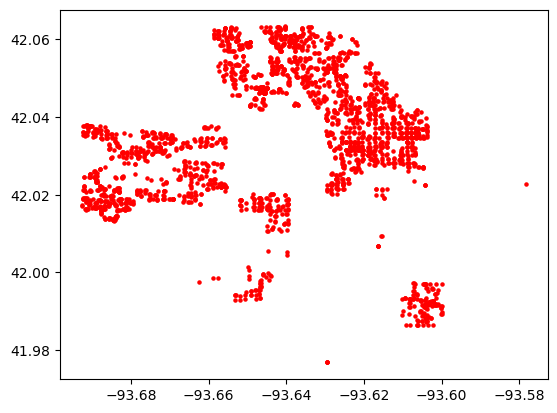

In [954]:
#Seaborn plot
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    housing_m, geometry=gpd.points_from_xy(housing_m.long, housing_m.lat)) 

# Plot the GeoDataFrame
gdf.plot(marker='o', color='red', markersize=5)

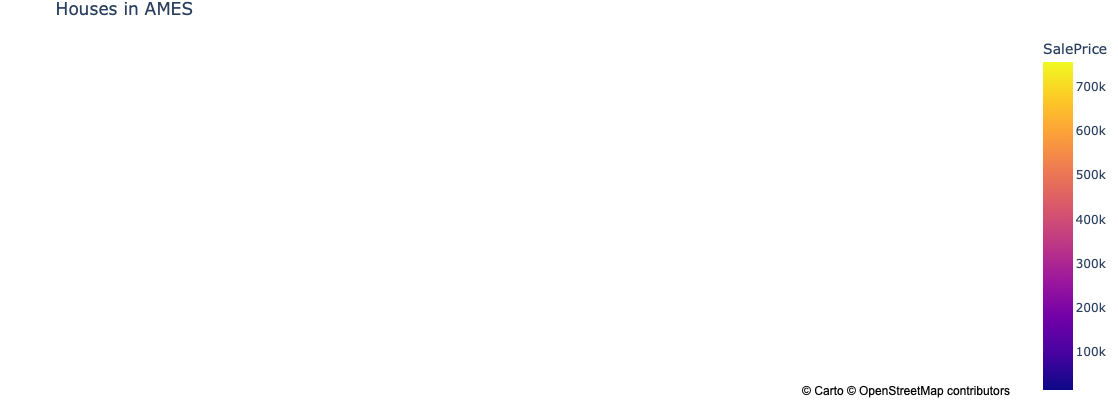

In [955]:
#Plotly Plot

fig = px.scatter_mapbox(housing_m, 
                        lat='lat', 
                        lon='long',  
                        # color='size',
                        # color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=10, 
                        color = 'SalePrice',
                        size = 'SalePrice',
                        hover_data = ['YrSold','PID'],
                        zoom=11,
                        mapbox_style="carto-positron"
                   )

# Update layout for better appearance
fig.update_layout(title='Houses in AMES',
                  margin={"r":1,"t":30,"l":0,"b":0},
                 width=600,  # Set the width of the plot
                height=400 
                 )

# Show plot
fig.show()
# fig.write_image("images/2019Tripmap.png")
# fig.write_image("images/2019Tripmap.svg")

In [734]:
# housing_m.PID.value_counts() #only one house was flipped in those four years
# flip_mask = housing_m.PID.value_counts()
# housing_m = housing_m.merge(flip_mask,how = 'left', left_on = 'PID', right_index = True)

<p><a name="ex_na"></a></p>

#### Filling NA's

In [1104]:
#Making a copy
housing_d = housing_m.copy()
housing_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2559 non-null   int64  
 1   GrLivArea      2559 non-null   int64  
 2   SalePrice      2559 non-null   int64  
 3   MSSubClass     2559 non-null   int64  
 4   MSZoning       2559 non-null   object 
 5   LotFrontage    2101 non-null   float64
 6   LotArea        2559 non-null   int64  
 7   Street         2559 non-null   object 
 8   Alley          166 non-null    object 
 9   LotShape       2559 non-null   object 
 10  LandContour    2559 non-null   object 
 11  Utilities      2559 non-null   object 
 12  LotConfig      2559 non-null   object 
 13  LandSlope      2559 non-null   object 
 14  Neighborhood   2559 non-null   object 
 15  Condition1     2559 non-null   object 
 16  Condition2     2559 non-null   object 
 17  BldgType       2559 non-null   object 
 18  HouseSty

In [1105]:
#NaN
housing_d.isna().sum()[housing_d.isna().sum()>0]

LotFrontage      458
Alley           2393
MasVnrType      1557
MasVnrArea        14
BsmtQual          64
BsmtCond          64
BsmtExposure      66
BsmtFinType1      64
BsmtFinSF1         1
BsmtFinType2      65
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1228
GarageType       126
GarageYrBlt      128
GarageFinish     128
GarageCars         1
GarageArea         1
GarageQual       128
GarageCond       128
PoolQC          2550
Fence           2038
MiscFeature     2462
lat               59
long              59
dtype: int64

In [1106]:
# fillna(0)
fill_na_0 = {'LotFrontage': '0', 
             'MasVnrArea': '0',
             'TotalBsmtSF': '0',
             'BsmtFinSF1': '0',
             'BsmtFinSF2': '0',
             'BsmtUnfSF': '0',
             'TotalBsmtSF': '0',
             'BsmtFullBath': '0',
             'BsmtHalfBath': '0'}
housing_d = housing_d.fillna(value = fill_na_0)

In [1107]:
#qa
housing_d.BsmtFinSF2.isna().sum()

0

In [1108]:
# fillna('None')
fill_na_None = {'MasVnrType': 'None',
                'BsmtQual': 'None',
                'BsmtCond': 'None',
                'BsmtFinType1': 'None',
                'BsmtFinType2': 'None',
                'BsmtExposure' : 'None',
                'GarageType': 'None',
                'GarageFinish': 'None',
                'GarageQual': 'None',
                'GarageCond': 'None',
                'PoolQC': 'None',
                'Fence': 'None',
                'MiscFeature': 'None'}
housing_d = housing_d.fillna(value = fill_na_None)

In [1109]:
housing_d.BsmtFinType2.isna().sum()

0

In [1110]:
#drop
drop_colums = ['Alley','FireplaceQu']
housing_d = housing_d.drop(columns = drop_colums)

In [1111]:
#custom
housing_d.Electrical = housing_d.Electrical.fillna('SBrkr')
garage_detch = housing_d[housing_d.GarageType=='Detchd'][['YearBuilt','GarageType','GarageYrBlt']]
housing_d.loc[(housing_d.GarageType=='Detchd') & (housing_d.GarageYrBlt.isna()),'GarageYrBlt'] = \
garage_detch[garage_detch['YearBuilt']<1950].describe().loc['50%','GarageYrBlt']

In [1112]:
housing_d.GarageYrBlt = housing_d.GarageYrBlt.fillna('0')

In [1113]:
housing_d.GarageCars = housing_d.GarageCars.fillna(
    housing_d[housing_d.GarageType=='Detchd'][['GarageCars']].describe().loc['50%','GarageCars'])
housing_d.GarageArea = housing_d.GarageArea.fillna(
    housing_d[housing_d.GarageType=='Detchd'][['GarageArea']].describe().loc['50%','GarageArea'])
housing_d.GarageArea

0       399.0
1       266.0
2       216.0
3       281.0
4       528.0
        ...  
2554    192.0
2555    452.0
2556    871.0
2557    486.0
2558    471.0
Name: GarageArea, Length: 2559, dtype: float64

In [1114]:
housing_d.isna().sum()[housing_d.isna().sum()>0]

lat     59
long    59
dtype: int64

#### Setting dtypes

In [1137]:
housing_d = housing_d.convert_dtypes()
housing_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2559 non-null   Int64  
 1   GrLivArea      2559 non-null   Int64  
 2   SalePrice      2559 non-null   Int64  
 3   MSSubClass     2559 non-null   Int64  
 4   MSZoning       2559 non-null   string 
 5   LotFrontage    2559 non-null   object 
 6   LotArea        2559 non-null   Int64  
 7   Street         2559 non-null   string 
 8   LotShape       2559 non-null   string 
 9   LandContour    2559 non-null   string 
 10  Utilities      2559 non-null   string 
 11  LotConfig      2559 non-null   string 
 12  LandSlope      2559 non-null   string 
 13  Neighborhood   2559 non-null   string 
 14  Condition1     2559 non-null   string 
 15  Condition2     2559 non-null   string 
 16  BldgType       2559 non-null   string 
 17  HouseStyle     2559 non-null   string 
 18  OverallQ

In [1154]:
for i in housing_d.select_dtypes(include='object').columns:
    housing_d[i] = housing_d[i].astype('int')

In [1158]:
housing_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2559 non-null   Int64  
 1   GrLivArea      2559 non-null   Int64  
 2   SalePrice      2559 non-null   Int64  
 3   MSSubClass     2559 non-null   Int64  
 4   MSZoning       2559 non-null   string 
 5   LotFrontage    2559 non-null   int64  
 6   LotArea        2559 non-null   Int64  
 7   Street         2559 non-null   string 
 8   LotShape       2559 non-null   string 
 9   LandContour    2559 non-null   string 
 10  Utilities      2559 non-null   string 
 11  LotConfig      2559 non-null   string 
 12  LandSlope      2559 non-null   string 
 13  Neighborhood   2559 non-null   string 
 14  Condition1     2559 non-null   string 
 15  Condition2     2559 non-null   string 
 16  BldgType       2559 non-null   string 
 17  HouseStyle     2559 non-null   string 
 18  OverallQ

In [1159]:
housing_d.to_csv('housing_cleaned.csv', index=False)

#### SKIP ALL CODE BELOW

In [ ]:
housing_d.LotFrontage.value_counts() #should convert to 0
# housing_d[housing_m.LotFrontage.isna()] 

In [659]:
housing_d.Alley.value_counts() #should probably drop bc too much missing data
housing_d = housing_d.drop(columns = 'Alley')

In [ ]:
housing_d.MasVnrType.value_counts() #fill na to None
# housing_d.MasVnrArea.isna().sum()
# housing_d.MasVnrType.isna()

In [ ]:
housing_d[~housing_d.MasVnrType.isna() & housing_d.MasVnrArea.isna()].shape #14 fill na = 0
housing_m[housing_m.MasVnrArea.isna()].shape

In [ ]:
housing_d[housing_d.BsmtQual.isna()] #fill na to None
housing_d.BsmtQual.value_counts()

In [ ]:
housing_d[housing_d.BsmtFinSF1.isna()] #fill na to None
housing_d.BsmtFinSF1.value_counts()

In [ ]:
housing_d[housing_d.TotalBsmtSF.isna()] # fill na is 0 for 1 record

In [ ]:
housing_d.Electrical.value_counts() # Change to Standard Circuit Breakers & Romex bc 'SBrkr' built in 2006
housing_d[housing_d.Electrical.isna()]

In [ ]:
housing_d[housing_d.BsmtFullBath.isna()] #fillna is 0
housing_d.BsmtFullBath.value_counts()

In [ ]:
housing_d.FireplaceQu.value_counts() # fill to None
# housing_d[housing_d.FireplaceQu.isna()]
# housing_d[housing_d.Fireplaces ==0]#.shape #1228

In [ ]:
housing_d[housing_d.GarageYrBlt.isna()][['GarageType']].value_counts()
housing_d[(housing_d.GarageYrBlt.isna()) & (housing_d.GarageType=='Detchd')][['YearBuilt','GarageYrBlt','YearRemodAdd']]
housing_d[(housing_d.GarageType=='Detchd') & (housing_d.YearBuilt > 1900) & (housing_d.YearBuilt < 1940)][['YearBuilt','GarageYrBlt','YearRemodAdd']].describe()
housing_d[(housing_d.GarageType=='Detchd') & (housing_d.YearBuilt > 1900) & (housing_d.YearBuilt < 1940)][['YearBuilt','GarageYrBlt','YearRemodAdd']]

In [1027]:
housing_d[housing_d.GarageType=='Detchd'].shape #(706, 83)
garage_detch = housing_d[housing_d.GarageType=='Detchd'][['YearBuilt','GarageType','GarageYrBlt']]
garage_detch['yr_diff'] = garage_detch['GarageYrBlt'] - garage_detch['YearBuilt']
garage_detch[garage_detch['YearBuilt']<1950].describe().loc['50%','GarageYrBlt']
# garage_detch[['YearBuilt','yr_diff']].plot.scatter(x = 'YearBuilt',y='yr_diff')

1941.0

In [982]:
housing_d.GarageType.value_counts() #Fill to None
housing_d.GarageYrBlt# = housing_d.GarageYrBlt.fillna(0) NEED HELP

0       1939.0
1       1984.0
2       1930.0
3       1940.0
4       2001.0
         ...  
2554    1916.0
2555    1955.0
2556    1949.0
2557    2000.0
2558    1993.0
Name: GarageYrBlt, Length: 2559, dtype: float64

In [1115]:
housing_m[~housing_m.MiscFeature.isna()].MiscFeature.value_counts()

MiscFeature
Shed    88
Gar2     5
Othr     3
TenC     1
Name: count, dtype: int64